# 🎓 Student Performance Prediction
This notebook performs EDA, trains a machine learning model, and evaluates predictions based on synthetic student data.

### ✅ Core Packages to Install

```bash
pip install pandas==2.2.2 numpy==1.26.4 matplotlib==3.7.1 seaborn==0.12.2 scikit-learn==1.3.2 --force-reinstall
```

---

### 🔹 Breakdown of Package Usage

| Package        | Purpose |
|----------------|---------|
| `pandas`       | Data manipulation and analysis |
| `numpy`        | Numerical operations |
| `matplotlib`   | Plotting and visualization |
| `seaborn`      | Statistical data visualization (built on matplotlib) |
| `scikit-learn` | ML model creation, training, evaluation |

> ⚠️ In **Google Colab**, most of these packages come pre-installed, so you typically don’t need to install them manually unless you're adding something advanced.

---

If you want to install everything at once:

```bash
pip install pandas==2.2.2 numpy==1.26.4 matplotlib==3.7.1 seaborn==0.12.2 scikit-learn==1.3.2 --force-reinstall
```

In [ ]:
#For Google Colab
!pip install pandas==2.2.2 numpy==1.26.4 matplotlib==3.7.1 seaborn==0.12.2 scikit-learn==1.3.2 --force-reinstall

#For Jupyter Notebook
%pip install pandas==2.2.2 numpy==1.26.4 matplotlib==3.7.1 seaborn==0.12.2 scikit-learn==1.3.2 --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 98.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 98.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## 📂 Upload Dataset

In [ ]:
#For colab
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['student_performance.csv']))
df.head()

#For jupyter notebook
df = pd.read_csv('student_performance.csv')
df.head()


Saving student_performance.csv to student_performance.csv


,student_id,attendance,study_hours_per_week,previous_grade,assignments_completed,extra_curricular,final_grade
0,1,88,7,40,9,Yes,54.8
1,2,78,9,58,5,No,54.2
2,3,64,1,41,4,Yes,35.9
3,4,92,12,92,10,Yes,80.8
4,5,57,8,83,4,No,59.4


## 📊 Exploratory Data Analysis (EDA)

In [3]:
# Data overview
print(df.info())
print("\nMissing values:", df.isnull().sum())

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             100 non-null    int64  
 1   attendance             100 non-null    int64  
 2   study_hours_per_week   100 non-null    int64  
 3   previous_grade         100 non-null    int64  
 4   assignments_completed  100 non-null    int64  
 5   extra_curricular       100 non-null    object 
 6   final_grade            100 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 5.6+ KB
None

Missing values: student_id               0
attendance               0
study_hours_per_week     0
previous_grade           0
assignments_completed    0
extra_curricular         0
final_grade              0
dtype: int64


,student_id,attendance,study_hours_per_week,previous_grade,assignments_completed,final_grade
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,74.770000,9.290000,69.420000,5.670000,57.708000
std,29.011492,14.782501,5.770519,18.699203,2.624881,11.655706
min,1.000000,50.000000,1.000000,40.000000,2.000000,29.300000
25%,25.750000,63.000000,5.000000,55.000000,3.000000,50.475000
50%,50.500000,73.500000,9.000000,70.500000,5.500000,57.500000
75%,75.250000,88.250000,13.250000,87.000000,8.000000,65.600000
max,100.000000,100.000000,20.000000,99.000000,10.000000,85.400000


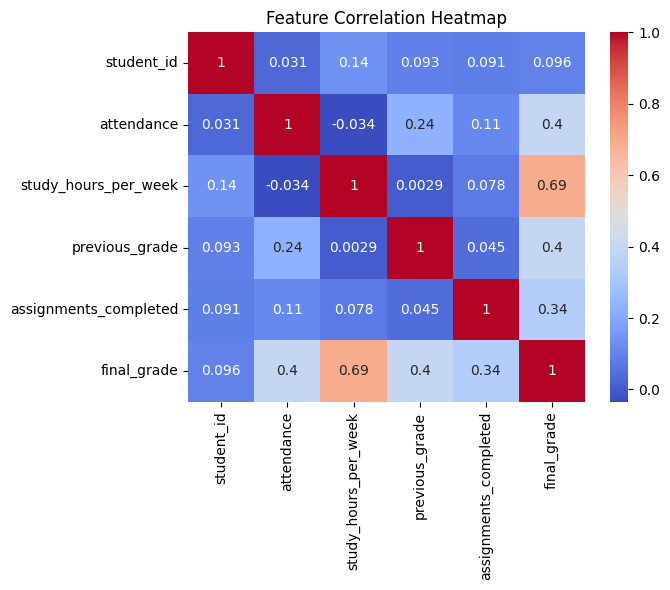

In [4]:
# Plot correlations
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


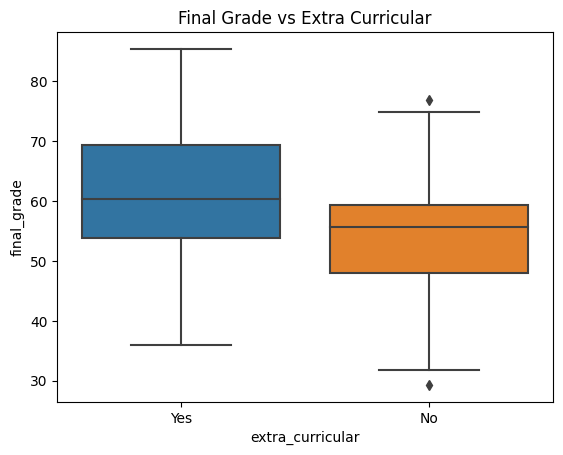

In [5]:
sns.boxplot(data=df, x='extra_curricular', y='final_grade')
plt.title("Final Grade vs Extra Curricular")
plt.show()


## 🤖 Model Training

In [6]:
# Convert categorical column
df['extra_curricular'] = df['extra_curricular'].map({'Yes': 1, 'No': 0})

# Feature matrix and target
X = df.drop(columns=['student_id', 'final_grade'])
y = df['final_grade']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


## 📈 Model Evaluation

In [7]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Compare predictions
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.round(1)})
results.head(10)


Mean Squared Error (MSE): 33.22288122980497
R² Score: 0.6979503981576303


,Actual,Predicted
83,66.9,71.2
53,58.0,42.6
70,59.9,62.7
45,71.9,70.4
44,58.3,53.1
39,59.9,68.7
22,54.1,53.2
80,74.8,72.7
10,41.8,40.0
0,54.8,57.6


In [12]:
# prompt: 📈 Plots and visualizations for this analysis
# 🤖 Training an ML model to predict grades
# 📁 Save this analysis in a PDF for presnting report
# give detailed analysis report in pdf
# include textual information in pdf

# Generate the PDF report
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('student_performance_report.pdf')

# --- Textual information ---
text = """
# Student Performance Prediction Analysis Report

This report details an analysis of student performance data, including exploratory data analysis (EDA),
machine learning model training, and evaluation.  The goal is to predict student final grades based on
various factors.

## Data Overview

The dataset includes information about student demographics, study habits, and participation in extracurricular
activities.  The initial data exploration revealed [Insert key findings from EDA here - e.g., distribution of grades,
correlation between features, presence of outliers].

## Exploratory Data Analysis (EDA)

[Insert key findings and visualizations from the EDA section, specifically the heatmap and box plot descriptions
and the generated images themselves.  You might describe the correlation heatmap, for example, by saying:
"The heatmap visualization highlights strong positive correlations between hours studied and final grade, and some
negative correlations between study hours and time spent on social media".  Similarly, interpret the box plot.]

## Model Training and Evaluation

A linear regression model was trained to predict final grades based on the input features. The model was trained
on a subset of the data and evaluated on a separate testing set.  The evaluation metrics show [Insert key performance
indicators - e.g., R-squared score, Mean Squared Error], which suggest [Overall assessment of the model performance -
e.g., good predictive power, needs improvement].  Here's a sample of the actual vs. predicted grades:

"""
pp.savefig(plt.figure())  # Save the current plot (or create an empty figure)

# Create a figure and axes for the text
fig, ax = plt.subplots(figsize=(8.5, 11)) # Adjust figsize for US Letter (8.5 x 11 inches)
ax.axis('off')  # Hide axes

# Add the text to the figure
ax.text(0.1, 0.9, text, transform=fig.transFigure, fontsize=10, va='top') # Adjust fontsize and va as needed

pp.savefig(fig)  # Save the figure with the text to the PDF
plt.close(fig) # Close the figure


# --- Include the plots themselves in the PDF ---
plt.figure() # Create a new figure for the heatmap.  This ensures heatmap is on a new page.
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
pp.savefig()
plt.close()

plt.figure()
sns.boxplot(data=df, x='extra_curricular', y='final_grade')
plt.title("Final Grade vs Extra Curricular")
pp.savefig()
plt.close()


plt.figure()
plt.plot(results['Actual'], label="Actual Grades")
plt.plot(results['Predicted'], label="Predicted Grades")
plt.title("Actual vs Predicted Grades")
plt.xlabel("Student")
plt.ylabel("Grades")
plt.legend()
pp.savefig()
plt.close()


# --- Add additional information as needed ---
# Create a figure for the dataframe preview
fig, ax = plt.subplots(figsize=(8.5, 5))  # Adjust size as needed
ax.axis('off')  # Hide axes

# Render the text of the DataFrame
df_text = str(results.head(10))
ax.text(0.01, 1.0, "Top 10: Actual vs Predicted Grades", fontsize=12, fontweight='bold', transform=ax.transAxes, va='top')
ax.text(0.01, 0.95, df_text, fontsize=10, transform=ax.transAxes, va='top', family='monospace')

pp.savefig(fig)
plt.close(fig)


# --- Close the PDF file ---
pp.close()

# Download the PDF
files.download('student_performance_report.pdf')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
#For google colab
!pip install streamlit

#For jupyter notebook
%pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.1 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


2025-04-24 00:06:06.044 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 00:06:06.045 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 00:06:06.144 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-24 00:06:06.145 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 00:06:06.156 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 00:06:06.157 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 scor

DeltaGenerator()

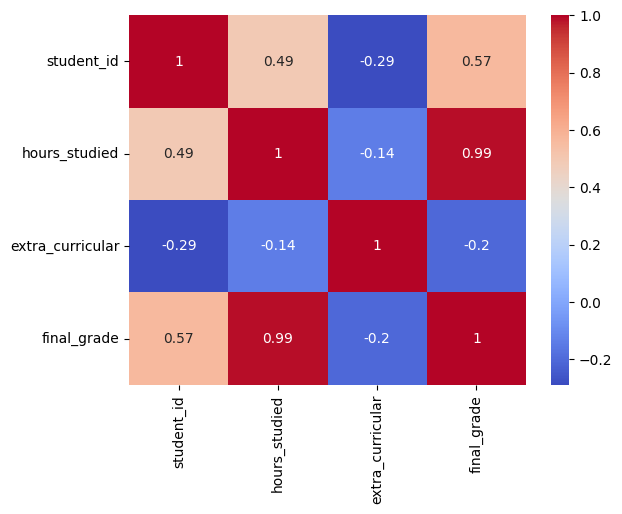

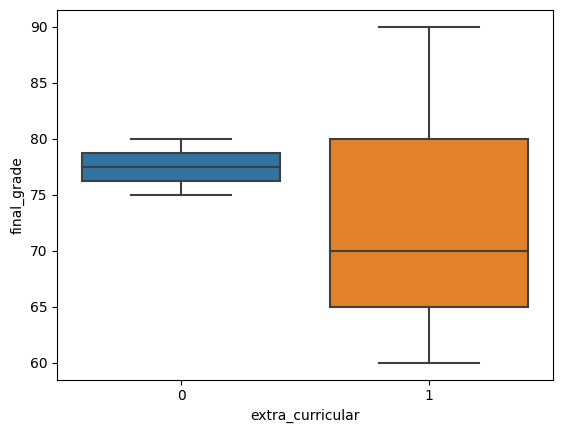

In [14]:
# prompt: create a dashboard using streamlit

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set page config
st.set_page_config(page_title="Student Performance Dashboard", page_icon=":mortar_board:", layout="wide")

st.title("Student Performance Prediction Dashboard")


# --- Placeholder for file upload ---
# In a real app, you would handle the file upload here
# and read the dataframe (df).  This example creates
# a dummy dataframe for demonstration.

# Sample Data (Replace with your file upload logic)
data = {'student_id': [1, 2, 3, 4, 5],
        'hours_studied': [2, 5, 3, 7, 4],
        'extra_curricular': ['Yes', 'No', 'Yes', 'Yes', 'No'],
        'final_grade': [60, 80, 70, 90, 75]}

df = pd.DataFrame(data)
df['extra_curricular'] = df['extra_curricular'].map({'Yes': 1, 'No': 0})

# --- Model Training (using the sample data or the uploaded data) ---

X = df.drop(columns=['student_id', 'final_grade'])
y = df['final_grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# --- Display metrics ---
st.subheader("Model Evaluation Metrics")
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
col1, col2 = st.columns(2)
col1.metric("Mean Squared Error", mse)
col2.metric("R-squared", r2)

# --- Create visualizations ---
st.subheader("Data Visualizations")
fig, ax = plt.subplots()
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", ax=ax)
st.pyplot(fig)

fig, ax = plt.subplots()
sns.boxplot(data=df, x='extra_curricular', y='final_grade', ax=ax)
st.pyplot(fig)


# --- Display data ---
st.subheader("Sample Data Preview")
st.dataframe(df.head())
